<a href="https://colab.research.google.com/github/fengfrankgthb/BUS-41204/blob/main/QQQ/QQQ_Paired_Strategy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paired Strategy Project With QQQ

## 1. Data Setup

In [18]:
# Read the CSV file directly from the /raw.githubusercontent.com/ URL
import pandas as pd
url = "https://raw.githubusercontent.com/fengfrankgthb/BUS-41204/main/QQQ/QQQ_history_990310_250505.csv"
qqq = pd.read_csv(url)
qqq

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,1999-03-10 00:00:00-05:00,43.335807,43.362296,42.620607,43.282829,5232000,0.0,0.0,0.0
1,1999-03-11 00:00:00-05:00,43.600687,43.852332,42.647088,43.494732,9688600,0.0,0.0,0.0
2,1999-03-12 00:00:00-05:00,43.335818,43.362307,42.090840,42.435196,8743600,0.0,0.0,0.0
3,1999-03-15 00:00:00-05:00,42.753072,43.706672,42.302761,43.653694,6369000,0.0,0.0,0.0
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.0,0.0,0.0
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.0,0.0,0.0
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,0.0,0.0,0.0
6578,2025-05-02 00:00:00-04:00,486.540009,490.910004,484.829987,488.829987,39155400,0.0,0.0,0.0


In [19]:
qqq.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Capital Gains'],
      dtype='object')

In [20]:
del qqq['Dividends']
del qqq['Stock Splits']
del qqq['Capital Gains']

In [27]:
# Make new row "C_n0d_O" as the same day close-to-open return rate
qqq['C_n0d_O'] = qqq['Close'] / qqq['Open'] - 1

# Make new row "O_b1d_C" as the open-to-previous.close return rate
# Create a new column with yesterday's close prices (shifted by 1 row)
qqq['b1d_C'] = qqq['Close'].shift(1)
qqq['O_b1d_C'] = qqq['Open'] / qqq['b1d_C'] - 1

# Make new column "Vol_b5d_RA" as excessive volume ratio
# Calculate the rolling average of the "volume" column for the last 5 days including today's
qqq['b5d_RAVol'] = qqq['Volume'].rolling(window=5).mean()
qqq['Vol_b5d_RA'] = qqq['Volume'] / qqq['b5d_RAVol'] - 1

# Make new column "f1d_C_C"  as the tomorrow-to-today's close return rate
# Create a new column with tomorrow's close prices (shifted by -1 row)
qqq['f1d_C'] = qqq['Close'].shift(-1)
qqq['f1d_C_C'] = qqq['f1d_C'] / qqq['Close'] - 1



qqq

,Date,Open,High,Low,Close,Volume,C_n0d_O,b1d_C,O_b1d_C,b5d_RAVol,Vol_b5d_RA,f1d_C,f1d_C_C
0,1999-03-10 00:00:00-05:00,43.335807,43.362296,42.620607,43.282829,5232000,-0.001222,NaN,NaN,NaN,NaN,43.494732,0.004896
1,1999-03-11 00:00:00-05:00,43.600687,43.852332,42.647088,43.494732,9688600,-0.002430,43.282829,0.007344,NaN,NaN,42.435196,-0.024360
2,1999-03-12 00:00:00-05:00,43.335818,43.362307,42.090840,42.435196,8743600,-0.020782,43.494732,-0.003654,NaN,NaN,43.653694,0.028714
3,1999-03-15 00:00:00-05:00,42.753072,43.706672,42.302761,43.653694,6369000,0.021066,42.435196,0.007491,NaN,NaN,44.024517,0.008495
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.004230,43.653694,0.004247,6987800.0,-0.297948,43.706669,-0.007220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.011400,472.410004,-0.004742,40923640.0,-0.251946,475.470001,-0.000126
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.017854,475.529999,-0.017664,39125540.0,0.196421,481.679993,0.013061
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,-0.003579,475.470001,0.016699,38597620.0,0.122258,488.829987,0.014844
6578,2025-05-02 00:00:00-04:00,486.540009,490.910004,484.829987,488.829987,39155400,0.004707,481.679993,0.010090,38689280.0,0.012048,485.929993,-0.005933


In [30]:
qqq = qqq.dropna()
qqq

,Date,Open,High,Low,Close,Volume,C_n0d_O,b1d_C,O_b1d_C,b5d_RAVol,Vol_b5d_RA,f1d_C,f1d_C_C
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.004230,43.653694,4.247080e-03,6987800.0,-0.297948,43.706669,-0.007220
5,1999-03-17 00:00:00-05:00,44.024536,44.077513,43.574224,43.706669,3965000,-0.007220,44.024517,4.196981e-07,6734400.0,-0.411232,44.554310,0.019394
6,1999-03-18 00:00:00-05:00,43.653688,44.580799,43.640443,44.554310,4848400,0.020631,43.706669,-1.212200e-03,5766360.0,-0.159192,43.415279,-0.025565
7,1999-03-19 00:00:00-05:00,45.137057,45.137057,43.388791,43.415279,7160400,-0.038146,44.554310,1.307947e-02,5449720.0,0.313902,42.885521,-0.012202
8,1999-03-22 00:00:00-05:00,43.600721,43.706677,42.806054,42.885521,5024800,-0.016403,43.415279,4.271347e-03,5180880.0,-0.030126,41.375645,-0.035207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,2025-04-28 00:00:00-04:00,473.029999,474.809998,466.029999,472.410004,33550800,-0.001311,472.559998,9.945853e-04,45261900.0,-0.258741,475.529999,0.006604
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.011400,472.410004,-4.741623e-03,40923640.0,-0.251946,475.470001,-0.000126
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.017854,475.529999,-1.766449e-02,39125540.0,0.196421,481.679993,0.013061
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,-0.003579,475.470001,1.669927e-02,38597620.0,0.122258,488.829987,0.014844


Remember the variables for ML:


* `X = qqq['C_n0d_O', 'O_b1d_C', 'Vol_b5d_RA']` Same day Close-to-Open0-return, Open-to-previous-Close-return, and excess-Vol-to-back-5-Day-Average ratio are commonly understood as predictors to the daily trading decisions.
* `y = qqq['f1d_C_C']` Forward-1-Day close return is the best candidate for what the model should be chasing at, as if we are trading for tomorrow returns at the end of each day.

## 2. Simple Linear Regression Model

In [38]:
# This is a static model that can't be used to directly predict future price.
# This is due the fact that the model is set up to use the entire time-series.
# However, this trial run can at least discover the the strength of correlations
# between the chosen X and the y.

# Import Required Libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictors (X) and target variable (y)
X = qqq[['C_n0d_O', 'O_b1d_C', 'Vol_b5d_RA']]
y = qqq['f1d_C_C']

# Split the Data into Training and Testing Sets:
# test_size=0.2: Reserves 20% of the data for testing and uses 80% for training
# random_state=42: Ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression Model:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared Score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Cross check the stdevs of the variables
stdevs = ['C_n0d_O', 'O_b1d_C', 'Vol_b5d_RA', 'f1d_C_C']

# Calculate the standard deviation for each column
stdevs = qqq[stdevs].std()

# Print the results
print("Standard Deviations for each column:")
print(stdevs)

Mean Squared Error: 0.00029585014390583935
R-squared Score: 8.31894234837316e-05
Coefficients: [-0.06669974 -0.05334775 -0.00125357]
Intercept: 0.0003949573484134486
Standard Deviations for each column:
C_n0d_O       0.014749
O_b1d_C       0.009047
Vol_b5d_RA    0.246039
f1d_C_C       0.017181
dtype: float64


### Understanding the results:

* MSE = 0.00029585, is nearly 2% of stdev of y (forward 1 day close return)
* $R^2$ = 0.00008319, meaning very small portion of the variance can be explained by linear regression.
* Coefficients are all negative, with 0.0666997, same day close to open return `C_n0d_O`, the highest absolute coefficient.

Linear Regression Model does a lousy job.

### Below, let's see scatter plots between target and each predictor.

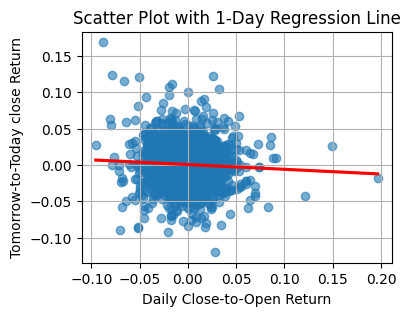

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'qqq' and you want to plot x vs y
x_column = "C_n0d_O"  # Replace with your column name for the x-axis
y_column = "f1d_C_C"  # Replace with your column name for the y-axis

# Create the scatter plot with regression line
plt.figure(figsize=(4, 3))
sns.regplot(data=qqq, x=x_column, y=y_column, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ci=None)

# Add labels and title
plt.xlabel("Daily Close-to-Open Return")  # Replace with your x-axis label
plt.ylabel("Tomorrow-to-Today close Return")  # Replace with your y-axis label
plt.title("Scatter Plot with 1-Day Regression Line")
plt.grid(True)

# Show the plot
plt.show()

**Clearly We need more data work, and refine the model.**

## 3. Long Only in 250 day Rolling Window

Market moves are time series. Later changes affects current decision more than earlier ones do. For example, price growth since 12 month ago cannot affect today's decision as much as that in last month can. It make sense to set up the prediction model on a discounted schedule based on length of time gap. A much simple way would be run regression within a trailing window, 250 day (yearly), 120 day (semi-annual), 60 day (quarterly), 25 day (monthly), or even 5 day (weekly).

Let's choose 250 day window for the model below.

In [69]:
import pandas as pd
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

window_size = 250
feature_cols = ['C_n0d_O', 'O_b1d_C', 'Vol_b5d_RA']
target_col = 'f1d_C_C'

# Function to compute y_pred in a rolling window
def rolling_regression_corrected(idx_of_prediction, df, window_size, features, target):
    """
    Calculates a prediction for df.iloc[idx_of_prediction].

    The prediction for day 'idx_of_prediction' (considered "tomorrow") is made
    using features from 'current_day_data_idx' (which is idx_of_prediction - 1, considered "current day").

    The model is trained on a window of 'window_size' days prior to 'current_day_data_idx',
    meaning the training data ends on 'current_day_data_idx - 1'.
    """

    # "Current day" is the day whose features are used for prediction
    current_day_data_idx = idx_of_prediction - 1

    # This function is called when idx_of_prediction >= window_size + 1,
    # so current_day_data_idx >= window_size.

    # Define the training window: 'window_size' days prior to 'current_day_data_idx', exclusive.
    # Training window spans from [current_day_data_idx - window_size] to [current_day_data_idx - 1].
    train_window_start_idx = current_day_data_idx - window_size
    # The end index for iloc slicing is exclusive
    train_window_end_idx_exclusive = current_day_data_idx

    # Ensure the training window start is not negative (already implicitly handled by loop condition)
    # if train_window_start_idx < 0:
    #     return np.nan

    training_window_df = df.iloc[train_window_start_idx : train_window_end_idx_exclusive]

    # Skip if the training window is not of the required size
    if len(training_window_df) < window_size:
        return np.nan

    X_train = training_window_df[features]
    y_train = training_window_df[target]

    # Add a constant to X_train for the intercept
    X_train_const = add_constant(X_train)

    # Fit the regression model
    try:
        model = OLS(y_train, X_train_const, missing='drop').fit() # 'missing=drop' handles NaNs in window
    except Exception as e:
        # print(f"Could not fit model for prediction at index {idx_of_prediction}: {e}")
        return np.nan


    # Features for prediction are from 'current_day_data_idx'
    # Ensure current_day_data_idx is within bounds (should be, due to loop)
    if current_day_data_idx >= len(df):
        return np.nan

    features_for_prediction_df = df.iloc[[current_day_data_idx]][features]

    # Check if features_for_prediction_df contains any NaN values for the required features
    if features_for_prediction_df.isnull().values.any():
        return np.nan

    # Add constant to the features for prediction, ensuring it matches training
    features_for_prediction_df_const = add_constant(features_for_prediction_df, has_constant='add')

    # Predict y for 'idx_of_prediction' using features from 'current_day_data_idx'
    try:
        prediction = model.predict(features_for_prediction_df_const)
        return prediction.iloc[0] # Access the first (and only) element
    except Exception as e:
        # print(f"Could not predict for index {idx_of_prediction}: {e}")
        return np.nan

# Initialize the prediction column
qqq['f1D_C_C_pred'] = np.nan

# Apply the rolling regression
# The loop iterates 'i' from 0 to len(qqq)-1.
# 'i' is the index in 'qqq' where the prediction ('f1D_C_C_pred') will be stored.
# This means qqq['f1D_C_C_pred'].iloc[i] is the prediction for day 'i'.
# This prediction for day 'i' is made using features from day 'i-1'.
# The training data for this model must be from day 'i-1-window_size' to 'i-2'.

# The first 'i' for which a prediction is possible:
# current_day_data_idx = i - 1
# train_window_start_idx = current_day_data_idx - window_size = (i - 1) - window_size
# We need train_window_start_idx >= 0, so i - 1 - window_size >= 0  => i >= window_size + 1.
for i in range(len(qqq)):
    if i >= window_size + 1:
        qqq.loc[qqq.index[i], 'f1D_C_C_pred'] = rolling_regression_corrected(i, qqq, window_size, feature_cols, target_col)
    # else: qqq['f1D_C_C_pred'].iloc[i] remains np.nan, which is correct

print(qqq.tail())
print(f"Number of actual predictions: {qqq['f1D_C_C_pred'].count()}")
print(f"Number of NaNs at the beginning: {qqq['f1D_C_C_pred'].isnull().sum() - (len(qqq) - qqq['f1D_C_C_pred'].count())}")

<ipython-input-69-be4ebe07d44e>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qqq['f1D_C_C_pred'] = np.nan


                           Date        Open        High         Low  \
6574  2025-04-28 00:00:00-04:00  473.029999  474.809998  466.029999   
6575  2025-04-29 00:00:00-04:00  470.170013  476.420013  469.589996   
6576  2025-04-30 00:00:00-04:00  467.130005  477.200012  462.429993   
6577  2025-05-01 00:00:00-04:00  483.410004  487.179993  480.739990   
6578  2025-05-02 00:00:00-04:00  486.540009  490.910004  484.829987   

           Close    Volume   C_n0d_O       b1d_C   O_b1d_C   b5d_RAVol  \
6574  472.410004  33550800 -0.001311  472.559998  0.000995  45261900.0   
6575  475.529999  30613100  0.011400  472.410004 -0.004742  40923640.0   
6576  475.470001  46810600  0.017854  475.529999 -0.017664  39125540.0   
6577  481.679993  43316500 -0.003579  475.470001  0.016699  38597620.0   
6578  488.829987  39155400  0.004707  481.679993  0.010090  38689280.0   

      Vol_b5d_RA       f1d_C   f1d_C_C  f1D_C_C_pred  
6574   -0.258741  475.529999  0.006604     -0.003039  
6575   -0.251946  

In [70]:
qqq


,Date,Open,High,Low,Close,Volume,C_n0d_O,b1d_C,O_b1d_C,b5d_RAVol,Vol_b5d_RA,f1d_C,f1d_C_C,f1D_C_C_pred
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.004230,43.653694,4.247080e-03,6987800.0,-0.297948,43.706669,-0.007220,NaN
5,1999-03-17 00:00:00-05:00,44.024536,44.077513,43.574224,43.706669,3965000,-0.007220,44.024517,4.196981e-07,6734400.0,-0.411232,44.554310,0.019394,NaN
6,1999-03-18 00:00:00-05:00,43.653688,44.580799,43.640443,44.554310,4848400,0.020631,43.706669,-1.212200e-03,5766360.0,-0.159192,43.415279,-0.025565,NaN
7,1999-03-19 00:00:00-05:00,45.137057,45.137057,43.388791,43.415279,7160400,-0.038146,44.554310,1.307947e-02,5449720.0,0.313902,42.885521,-0.012202,NaN
8,1999-03-22 00:00:00-05:00,43.600721,43.706677,42.806054,42.885521,5024800,-0.016403,43.415279,4.271347e-03,5180880.0,-0.030126,41.375645,-0.035207,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,2025-04-28 00:00:00-04:00,473.029999,474.809998,466.029999,472.410004,33550800,-0.001311,472.559998,9.945853e-04,45261900.0,-0.258741,475.529999,0.006604,-0.003039
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.011400,472.410004,-4.741623e-03,40923640.0,-0.251946,475.470001,-0.000126,0.001032
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.017854,475.529999,-1.766449e-02,39125540.0,0.196421,481.679993,0.013061,-0.004271
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,-0.003579,475.470001,1.669927e-02,38597620.0,0.122258,488.829987,0.014844,-0.010281


In [71]:
# Count when columns 'f1d_C_C' and 'f1D_C_C_pred' are both +/-

# Create a boolean mask indicating where both columns have the same sign
same_sign_mask = (qqq['f1d_C_C'] >= 0) == (qqq['f1D_C_C_pred'] >= 0)

# Filter the DataFrame using the mask to get the rows where both columns have the same sign
same_sign_rows = qqq[same_sign_mask]

# Count the number of such days
num_days_same_sign = len(same_sign_rows)

print(f"Number of days where 'f1d_C_C' and 'f1D_C_C_pred' have the same sign: {num_days_same_sign}")

Number of days where 'f1d_C_C' and 'f1D_C_C_pred' have the same sign: 3439


In [72]:
import pandas as pd

# Assuming your DataFrame is named 'qqq' with columns 'f1D_C_C_pred', 'Close', etc.

# Initialize 'Cash' and 'PV' columns with initial values
qqq['Cash'] = 0.0  # Initialize with 0.0
qqq['PV'] = 0.0  # Initialize with 0.0
qqq.loc[qqq.index[0], ['Cash', 'PV']] = [10000.0, 0.0]  # Set initial values for the first row

# Iterate through rows and update 'Cash' and 'PV' based on conditions
for i in range(1, len(qqq)):
    prev_cash = qqq.loc[qqq.index[i - 1], 'Cash']
    prev_pv = qqq.loc[qqq.index[i - 1], 'PV']
    prev_close = qqq.loc[qqq.index[i - 1], 'Close']
    curr_close = qqq.loc[qqq.index[i], 'Close']
    pred = qqq.loc[qqq.index[i], 'f1D_C_C_pred']

    if pred > 0:  # Positive prediction
        if prev_cash > 0:  # Previous row 'Cash' is positive
            qqq.loc[qqq.index[i], ['Cash', 'PV']] = [0.0, prev_cash]
        else:  # Previous row 'Cash' is 0
            qqq.loc[qqq.index[i], ['Cash', 'PV']] = [0.0, prev_pv / prev_close * curr_close]
    else:  # Negative prediction
        if prev_cash > 0:  # Previous row 'Cash' is positive
            qqq.loc[qqq.index[i], ['Cash', 'PV']] = [prev_cash, 0.0]
        else:  # Previous row 'Cash' is 0
            qqq.loc[qqq.index[i], ['Cash', 'PV']] = [prev_pv / prev_close * curr_close, 0.0]

# Set dtype to float64
qqq['Cash'] = qqq['Cash'].astype('float64')
qqq['PV'] = qqq['PV'].astype('float64')

print(qqq[['f1D_C_C_pred', 'Cash', 'PV']].head())

<ipython-input-72-61bf99eb9b53>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qqq['Cash'] = 0.0  # Initialize with 0.0
<ipython-input-72-61bf99eb9b53>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qqq['PV'] = 0.0  # Initialize with 0.0


   f1D_C_C_pred     Cash   PV
4           NaN  10000.0  0.0
5           NaN  10000.0  0.0
6           NaN  10000.0  0.0
7           NaN  10000.0  0.0
8           NaN  10000.0  0.0


<ipython-input-72-61bf99eb9b53>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qqq['Cash'] = qqq['Cash'].astype('float64')
<ipython-input-72-61bf99eb9b53>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qqq['PV'] = qqq['PV'].astype('float64')


In [73]:
qqq

,Date,Open,High,Low,Close,Volume,C_n0d_O,b1d_C,O_b1d_C,b5d_RAVol,Vol_b5d_RA,f1d_C,f1d_C_C,f1D_C_C_pred,Cash,PV
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.004230,43.653694,4.247080e-03,6987800.0,-0.297948,43.706669,-0.007220,NaN,10000.000000,0.000000
5,1999-03-17 00:00:00-05:00,44.024536,44.077513,43.574224,43.706669,3965000,-0.007220,44.024517,4.196981e-07,6734400.0,-0.411232,44.554310,0.019394,NaN,10000.000000,0.000000
6,1999-03-18 00:00:00-05:00,43.653688,44.580799,43.640443,44.554310,4848400,0.020631,43.706669,-1.212200e-03,5766360.0,-0.159192,43.415279,-0.025565,NaN,10000.000000,0.000000
7,1999-03-19 00:00:00-05:00,45.137057,45.137057,43.388791,43.415279,7160400,-0.038146,44.554310,1.307947e-02,5449720.0,0.313902,42.885521,-0.012202,NaN,10000.000000,0.000000
8,1999-03-22 00:00:00-05:00,43.600721,43.706677,42.806054,42.885521,5024800,-0.016403,43.415279,4.271347e-03,5180880.0,-0.030126,41.375645,-0.035207,NaN,10000.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,2025-04-28 00:00:00-04:00,473.029999,474.809998,466.029999,472.410004,33550800,-0.001311,472.559998,9.945853e-04,45261900.0,-0.258741,475.529999,0.006604,-0.003039,91903.040737,0.000000
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.011400,472.410004,-4.741623e-03,40923640.0,-0.251946,475.470001,-0.000126,0.001032,0.000000,91903.040737
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.017854,475.529999,-1.766449e-02,39125540.0,0.196421,481.679993,0.013061,-0.004271,91891.445342,0.000000
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,-0.003579,475.470001,1.669927e-02,38597620.0,0.122258,488.829987,0.014844,-0.010281,91891.445342,0.000000


In [76]:
# Rename columns PV and Cash
qqq = qqq.rename(columns={'PV': 'PV_Long_Only',
                          'Cash': 'Cash_Long_Only'})

In [77]:
qqq

,Date,Open,High,Low,Close,Volume,C_n0d_O,b1d_C,O_b1d_C,b5d_RAVol,Vol_b5d_RA,f1d_C,f1d_C_C,f1D_C_C_pred,Cash_Long_Only,PV_Long_Only
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.004230,43.653694,4.247080e-03,6987800.0,-0.297948,43.706669,-0.007220,NaN,10000.000000,0.000000
5,1999-03-17 00:00:00-05:00,44.024536,44.077513,43.574224,43.706669,3965000,-0.007220,44.024517,4.196981e-07,6734400.0,-0.411232,44.554310,0.019394,NaN,10000.000000,0.000000
6,1999-03-18 00:00:00-05:00,43.653688,44.580799,43.640443,44.554310,4848400,0.020631,43.706669,-1.212200e-03,5766360.0,-0.159192,43.415279,-0.025565,NaN,10000.000000,0.000000
7,1999-03-19 00:00:00-05:00,45.137057,45.137057,43.388791,43.415279,7160400,-0.038146,44.554310,1.307947e-02,5449720.0,0.313902,42.885521,-0.012202,NaN,10000.000000,0.000000
8,1999-03-22 00:00:00-05:00,43.600721,43.706677,42.806054,42.885521,5024800,-0.016403,43.415279,4.271347e-03,5180880.0,-0.030126,41.375645,-0.035207,NaN,10000.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,2025-04-28 00:00:00-04:00,473.029999,474.809998,466.029999,472.410004,33550800,-0.001311,472.559998,9.945853e-04,45261900.0,-0.258741,475.529999,0.006604,-0.003039,91903.040737,0.000000
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.011400,472.410004,-4.741623e-03,40923640.0,-0.251946,475.470001,-0.000126,0.001032,0.000000,91903.040737
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.017854,475.529999,-1.766449e-02,39125540.0,0.196421,481.679993,0.013061,-0.004271,91891.445342,0.000000
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,-0.003579,475.470001,1.669927e-02,38597620.0,0.122258,488.829987,0.014844,-0.010281,91891.445342,0.000000


In [83]:
# Create column 'C_PV_Long_Only' to keep the total investment values
qqq['C_PV_Long_Only'] = qqq['Cash_Long_Only'] + qqq['PV_Long_Only']
qqq

,Date,Open,High,Low,Close,Volume,C_n0d_O,b1d_C,O_b1d_C,b5d_RAVol,Vol_b5d_RA,f1d_C,f1d_C_C,f1D_C_C_pred,Cash_Long_Only,PV_Long_Only,C_PV_Long_Only
4,1999-03-16 00:00:00-05:00,43.839095,44.209939,43.362295,44.024517,4905800,0.004230,43.653694,4.247080e-03,6987800.0,-0.297948,43.706669,-0.007220,NaN,10000.000000,0.000000,10000.000000
5,1999-03-17 00:00:00-05:00,44.024536,44.077513,43.574224,43.706669,3965000,-0.007220,44.024517,4.196981e-07,6734400.0,-0.411232,44.554310,0.019394,NaN,10000.000000,0.000000,10000.000000
6,1999-03-18 00:00:00-05:00,43.653688,44.580799,43.640443,44.554310,4848400,0.020631,43.706669,-1.212200e-03,5766360.0,-0.159192,43.415279,-0.025565,NaN,10000.000000,0.000000,10000.000000
7,1999-03-19 00:00:00-05:00,45.137057,45.137057,43.388791,43.415279,7160400,-0.038146,44.554310,1.307947e-02,5449720.0,0.313902,42.885521,-0.012202,NaN,10000.000000,0.000000,10000.000000
8,1999-03-22 00:00:00-05:00,43.600721,43.706677,42.806054,42.885521,5024800,-0.016403,43.415279,4.271347e-03,5180880.0,-0.030126,41.375645,-0.035207,NaN,10000.000000,0.000000,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,2025-04-28 00:00:00-04:00,473.029999,474.809998,466.029999,472.410004,33550800,-0.001311,472.559998,9.945853e-04,45261900.0,-0.258741,475.529999,0.006604,-0.003039,91903.040737,0.000000,91903.040737
6575,2025-04-29 00:00:00-04:00,470.170013,476.420013,469.589996,475.529999,30613100,0.011400,472.410004,-4.741623e-03,40923640.0,-0.251946,475.470001,-0.000126,0.001032,0.000000,91903.040737,91903.040737
6576,2025-04-30 00:00:00-04:00,467.130005,477.200012,462.429993,475.470001,46810600,0.017854,475.529999,-1.766449e-02,39125540.0,0.196421,481.679993,0.013061,-0.004271,91891.445342,0.000000,91891.445342
6577,2025-05-01 00:00:00-04:00,483.410004,487.179993,480.739990,481.679993,43316500,-0.003579,475.470001,1.669927e-02,38597620.0,0.122258,488.829987,0.014844,-0.010281,91891.445342,0.000000,91891.445342


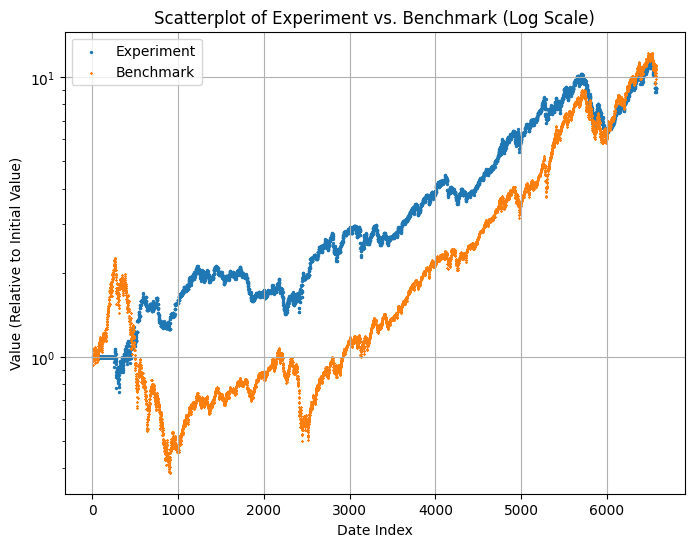

In [82]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'qqq' with columns 'C_PV_Long_Only' and 'Close'

# Create the scatterplot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Get initial values for scaling
initial_experiment_value = qqq['C_PV_Long_Only'].iloc[0]
initial_benchmark_value = qqq['Close'].iloc[0]

# Plot the data with log scale and scaling
plt.scatter(qqq.index, qqq['C_PV_Long_Only'] / initial_experiment_value, label="Experiment", marker='o', s=2)
plt.scatter(qqq.index, qqq['Close'] / initial_benchmark_value, label="Benchmark", marker='x', s=1)

# Customize the plot
plt.xlabel("Date Index")
plt.ylabel("Value (Relative to Initial Value)")
plt.title("Scatterplot of Experiment vs. Benchmark (Log Scale)")
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [86]:
# Compare Prospective Daily Returns at every entry point
# Calculate 'Prosp_R_Bench' return
qqq['Prosp_R_Bench'] = qqq['Close'].shift(1) / qqq['Close'] - 1

# Calculate 'Prosp_R_Long'
qqq['Prosp_R_Long'] = qqq['C_PV_Long_Only'].shift(1) / qqq['C_PV_Long_Only'] - 1

# print(qqq[['Prosp_R_Bench', 'Prosp_R_Long']].head())  # Print the first few rows to verify

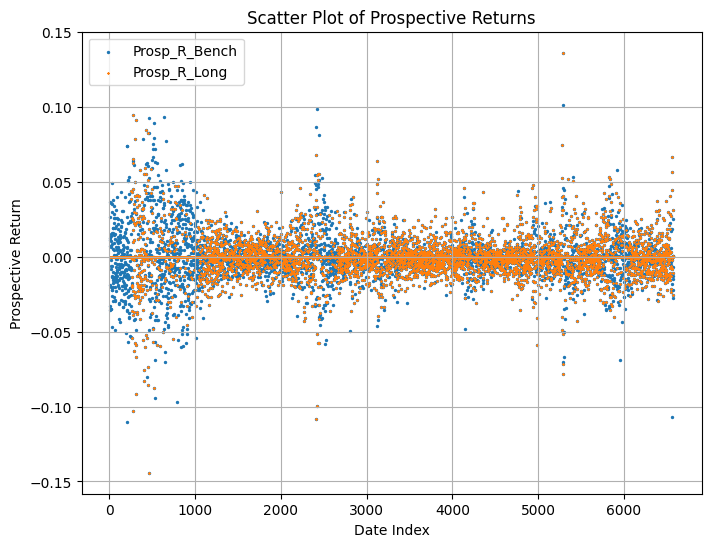

In [87]:
# Create the scatter plots
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

plt.scatter(qqq.index, qqq['Prosp_R_Bench'], label="Prosp_R_Bench", marker='o', s=2)
plt.scatter(qqq.index, qqq['Prosp_R_Long'], label="Prosp_R_Long", marker='x', s=1)

# Customize the plot
plt.xlabel("Date Index")
plt.ylabel("Prospective Return")
plt.title("Scatter Plot of Prospective Returns")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()